In [223]:
import pandas as pd

In [224]:
import numpy as np

In [225]:
import seaborn as sns

In [226]:
import matplotlib.pyplot as plt

In [227]:
import pandas_profiling

In [228]:
import glob

In [229]:
import matplotlib.colors as mcolors

In [230]:
import random

In [231]:
import math

In [232]:
import time

In [233]:
! pip install scikit-learn

In [234]:
from sklearn .linear_model import LinearRegression

In [235]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [236]:
import datetime

In [237]:
%matplotlib inline

In [238]:
import os

In [239]:
import sys

In [240]:
c = pd.read_csv(r"C:\Users\LENOVO\Desktop\novel-corona-virus-2019-dataset\conformed.csv")

In [241]:
d = pd.read_csv(r"C:\Users\LENOVO\Desktop\novel-corona-virus-2019-dataset\deaths.csv")

In [242]:
r= pd.read_csv(r"C:\Users\LENOVO\Desktop\novel-corona-virus-2019-dataset\recovered.csv")

In [243]:
c.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91


In [244]:
d.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,4,4,5,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.18238,116.4142,0,0,0,0,0,1,...,3,3,3,3,4,4,4,4,4,4
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,3,3,4,5,5,5,5,5,5,6
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [245]:
r.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,105,127,157,193,221,255,280,361,413,474
1,Beijing,Mainland China,40.18238,116.4142,0,0,1,2,2,2,...,48,56,69,80,98,108,114,122,145,153
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,79,102,128,152,184,207,225,254,274,299
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,45,53,57,63,71,82,90,93,112,126
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,24,31,39,39,49,54,58,62,65,71


In [246]:
cols = c.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20'],
      dtype='object')

In [247]:
confirmed = c.loc[:, cols[4]:cols[-1]]
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,1,9,15,39,60,70,106,152,200,237,...,860,889,910,934,950,962,973,982,986,987
1,14,22,36,41,68,80,91,111,114,139,...,342,352,366,372,375,380,381,387,393,395
2,6,9,27,57,75,110,132,147,182,211,...,505,518,529,537,544,551,553,555,560,567
3,1,5,10,18,35,59,80,84,101,120,...,267,272,279,281,285,287,290,292,293,293
4,0,2,2,4,7,14,19,24,26,29,...,86,87,90,90,90,90,91,91,91,91


In [248]:
deaths = d.loc[:,cols[4]:cols[-1]]
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,0,0,0,0,0,0,0,0,0,0,...,4,4,5,6,6,6,6,6,6,6
1,0,0,0,0,0,1,1,1,1,1,...,3,3,3,3,4,4,4,4,4,4
2,0,0,0,0,0,0,0,0,0,0,...,3,3,4,5,5,5,5,5,5,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [249]:
recovered = r.loc[:,cols[4]:cols[-1]]
recovered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,0,0,0,0,0,0,0,2,2,3,...,105,127,157,193,221,255,280,361,413,474
1,0,0,1,2,2,2,4,4,4,5,...,48,56,69,80,98,108,114,122,145,153
2,0,0,0,0,0,0,0,1,1,1,...,79,102,128,152,184,207,225,254,274,299
3,0,0,0,0,0,0,0,0,0,0,...,45,53,57,63,71,82,90,93,112,126
4,0,0,0,0,0,0,0,0,0,0,...,24,31,39,39,49,54,58,62,65,71


In [250]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered=[]

for i in dates:
    confirmed_sum = confirmed[i].sum()
    deaths_sum = deaths[i].sum()
    recovered_sum = recovered.sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(deaths_sum)
    mortality_rate.append(deaths_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [251]:
len(world_cases),len(total_deaths),len(mortality_rate),len(total_recovered)

(30, 30, 30, 30)

In [252]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [253]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29]])

In [254]:
days_in_future = 3
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)

In [255]:
future_forecast[0:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [256]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forecast_dates[:-3]

In [257]:
start_date

datetime.datetime(2020, 1, 22, 0, 0)

In [258]:
adjusted_dates[0:5]

['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020']

In [259]:
future_forecast_dates[0:5]

['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020']

In [260]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [261]:
x_train_confirmed,x_test_confirmed,y_train_confirmed,y_test_confirmed = train_test_split(days_since_1_22,world_cases,test_size=0.1,shuffle=False)

In [262]:
linear_model = LinearRegression(fit_intercept=False,normalize=True)
linear_model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [263]:
linear_model.fit(x_train_confirmed,y_train_confirmed)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [264]:
linear_model.fit(x_test_confirmed,y_test_confirmed)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [265]:
test_linear_pred = linear_model.predict(x_test_confirmed)

In [266]:
linear_pred =linear_model.predict(future_forecast)
linear_pred

array([[    0.        ],
       [ 2700.2740017 ],
       [ 5400.5480034 ],
       [ 8100.8220051 ],
       [10801.0960068 ],
       [13501.3700085 ],
       [16201.6440102 ],
       [18901.91801189],
       [21602.19201359],
       [24302.46601529],
       [27002.74001699],
       [29703.01401869],
       [32403.28802039],
       [35103.56202209],
       [37803.83602379],
       [40504.11002549],
       [43204.38402719],
       [45904.65802889],
       [48604.93203059],
       [51305.20603229],
       [54005.48003398],
       [56705.75403568],
       [59406.02803738],
       [62106.30203908],
       [64806.57604078],
       [67506.85004248],
       [70207.12404418],
       [72907.39804588],
       [75607.67204758],
       [78307.94604928],
       [81008.22005098],
       [83708.49405268],
       [86408.76805438]])

In [267]:
linear_model.coef_

array([[2700.2740017]])

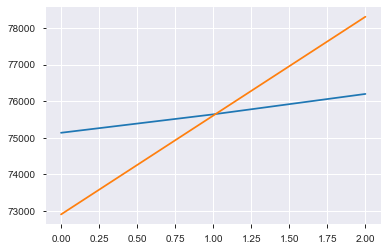

In [268]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

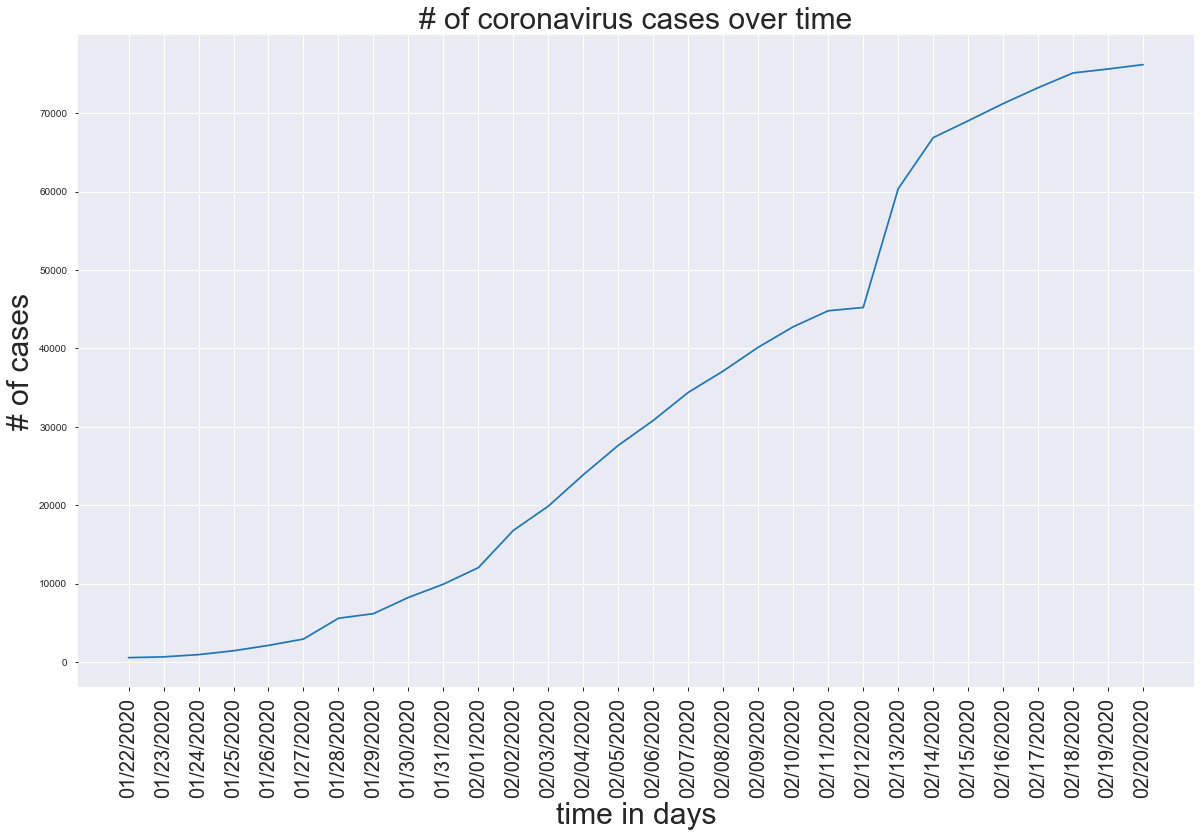

In [269]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.title('# of coronavirus cases over time',size=30)
plt.xlabel('time in days',size=30)
plt.ylabel('# of cases',size=30)
plt.xticks(rotation=90,size=20)
plt.show()

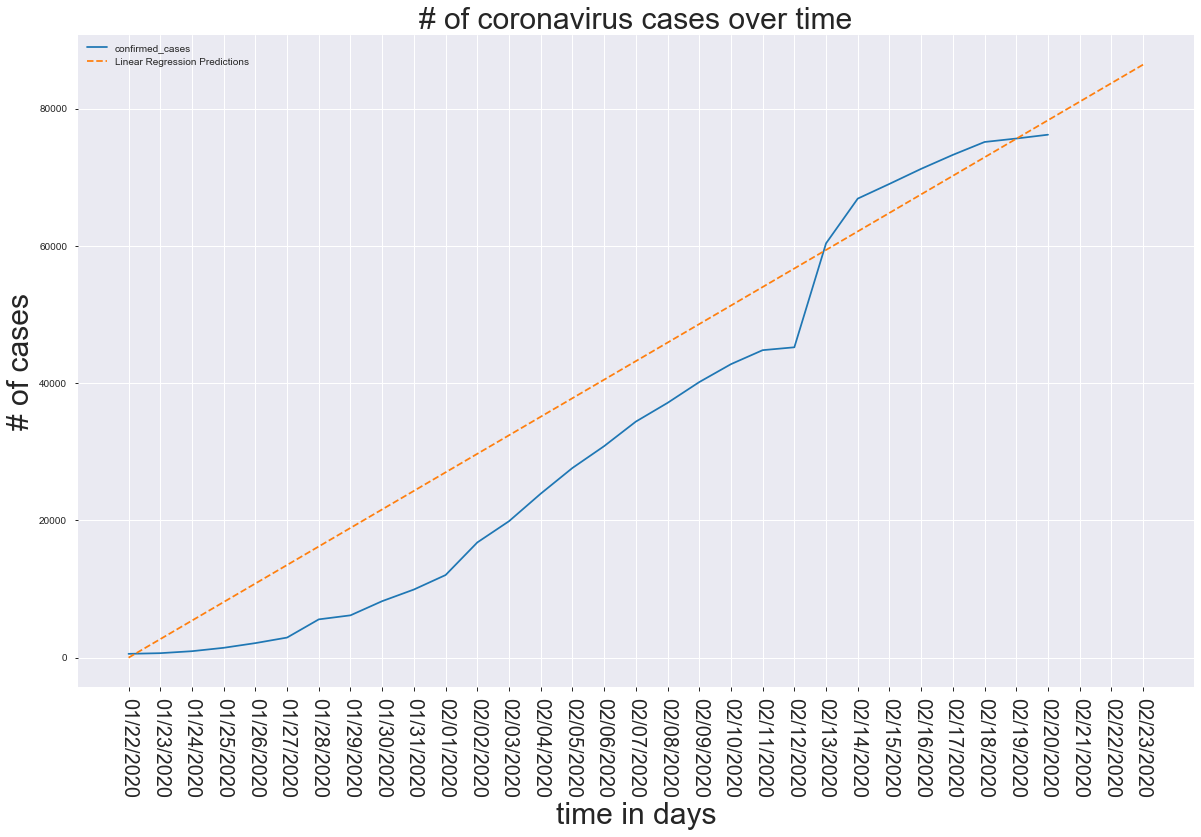

In [270]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast_dates,linear_pred,linestyle='dashed')
plt.title('# of coronavirus cases over time',size=30)
plt.xlabel('time in days',size=30)
plt.ylabel('# of cases',size=30)
plt.legend(['confirmed_cases','Linear Regression Predictions'])
plt.xticks(rotation=270,size=20)
plt.show()

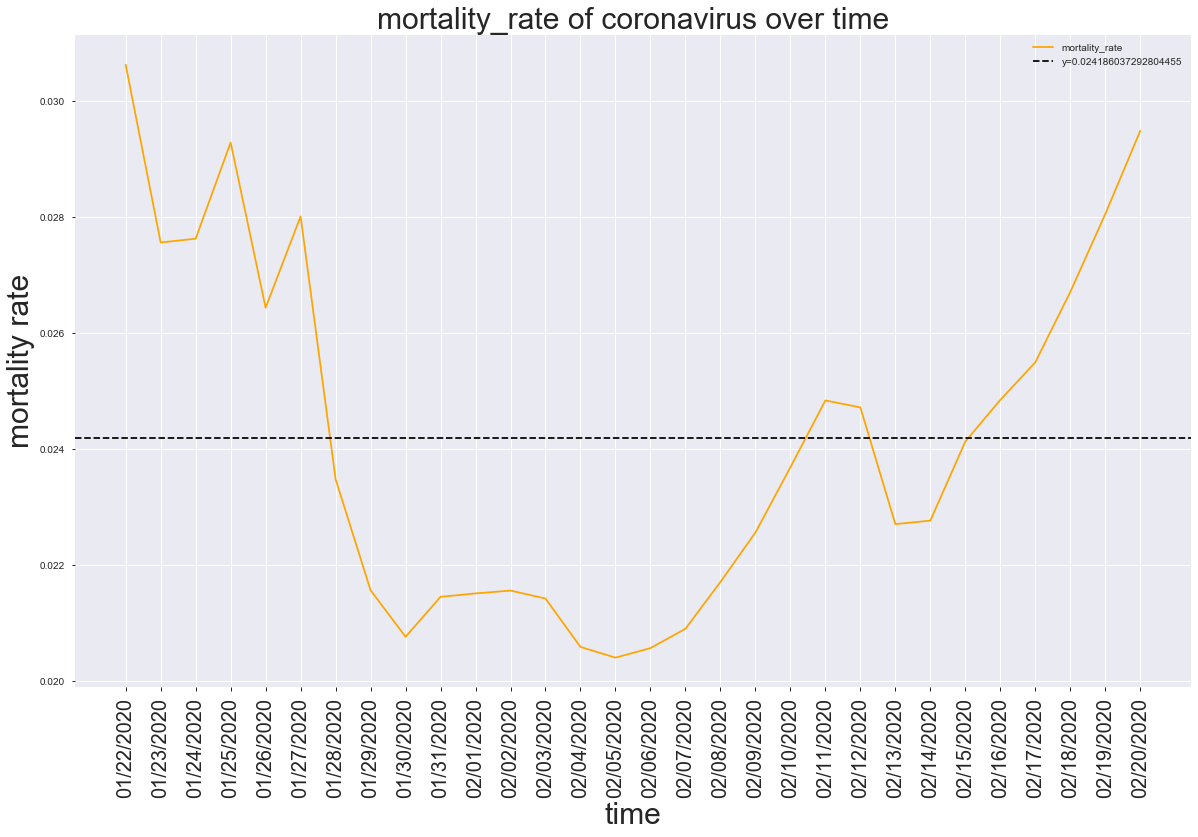

In [271]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,mortality_rate,color='orange')
plt.axhline(y= mean_mortality_rate,linestyle='--',color='black')
plt.title('mortality_rate of coronavirus over time',size=30)
plt.legend(['mortality_rate','y='+str(mean_mortality_rate)])
plt.xlabel('time',size=30)
plt.ylabel('mortality rate',size=30)
plt.xticks(rotation=90,size=20)
plt.show()

# Death rate due to corona virus

In [272]:
cols1 =d.keys()
cols1

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20'],
      dtype='object')

In [273]:
dates1 = deaths.keys()
world_cases1 = []
total_deaths1 = []
mortality_rate1 = []
total_recovered1=[]

for i in dates1:
    confirmed_sum1 = confirmed[i].sum()
    deaths_sum1 = deaths[i].sum()
    recovered_sum1 = recovered.sum()
    world_cases1.append(confirmed_sum1)
    total_deaths1.append(deaths_sum1)
    mortality_rate1.append(deaths_sum1/confirmed_sum1)
    total_recovered1.append(recovered_sum1)

In [274]:
len(world_cases1),len(total_deaths1),len(mortality_rate1),len(total_recovered1)

(30, 30, 30, 30)

In [275]:
days_since_1_22 = np.array([i for i in range(len(dates1))]).reshape(-1,1)
world_cases1 = np.array(world_cases1).reshape(-1,1)
total_deaths1 = np.array(total_deaths1).reshape(-1,1)
total_recovered1=np.array(total_recovered1).reshape(-1,1)

In [276]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29]])

In [277]:
days_in_future1 = 3
future_forecast1 = np.array([i for i in range(len(dates)+days_in_future1)]).reshape(-1,1)

In [278]:
future_forecast1[0:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [279]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates1 = []
for i in range(len(future_forecast1)):
    future_forecast_dates1.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates1 = future_forecast_dates1[:-3]

In [280]:
start_date

datetime.datetime(2020, 1, 22, 0, 0)

In [281]:
future_forecast_dates1[0:6]

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020']

In [282]:
adjusted_dates1[0:7]

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020']

In [283]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [284]:
x_train_deaths,x_test_deaths,y_train_deaths,y_test_deaths = train_test_split(days_since_1_22,world_cases1,test_size=0.1,shuffle=False)

In [285]:
linear_model2 = LinearRegression(fit_intercept=False,normalize=True)
linear_model2

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [286]:
linear_model2.fit(x_train_deaths,y_train_deaths)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [287]:
linear_model2.fit(x_test_deaths,y_test_deaths)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [288]:
test_linear_pred1 = linear_model2.predict(x_test_deaths)

In [289]:
linear_pred1 =linear_model2.predict(future_forecast1)
linear_pred1

array([[    0.        ],
       [ 2700.2740017 ],
       [ 5400.5480034 ],
       [ 8100.8220051 ],
       [10801.0960068 ],
       [13501.3700085 ],
       [16201.6440102 ],
       [18901.91801189],
       [21602.19201359],
       [24302.46601529],
       [27002.74001699],
       [29703.01401869],
       [32403.28802039],
       [35103.56202209],
       [37803.83602379],
       [40504.11002549],
       [43204.38402719],
       [45904.65802889],
       [48604.93203059],
       [51305.20603229],
       [54005.48003398],
       [56705.75403568],
       [59406.02803738],
       [62106.30203908],
       [64806.57604078],
       [67506.85004248],
       [70207.12404418],
       [72907.39804588],
       [75607.67204758],
       [78307.94604928],
       [81008.22005098],
       [83708.49405268],
       [86408.76805438]])

In [290]:
linear_model2.coef_

array([[2700.2740017]])

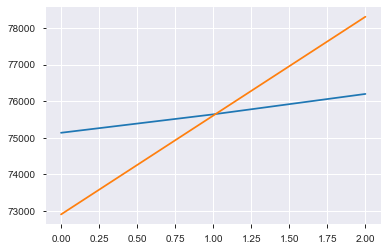

In [291]:
plt.plot(y_test_deaths)
plt.plot(test_linear_pred1)

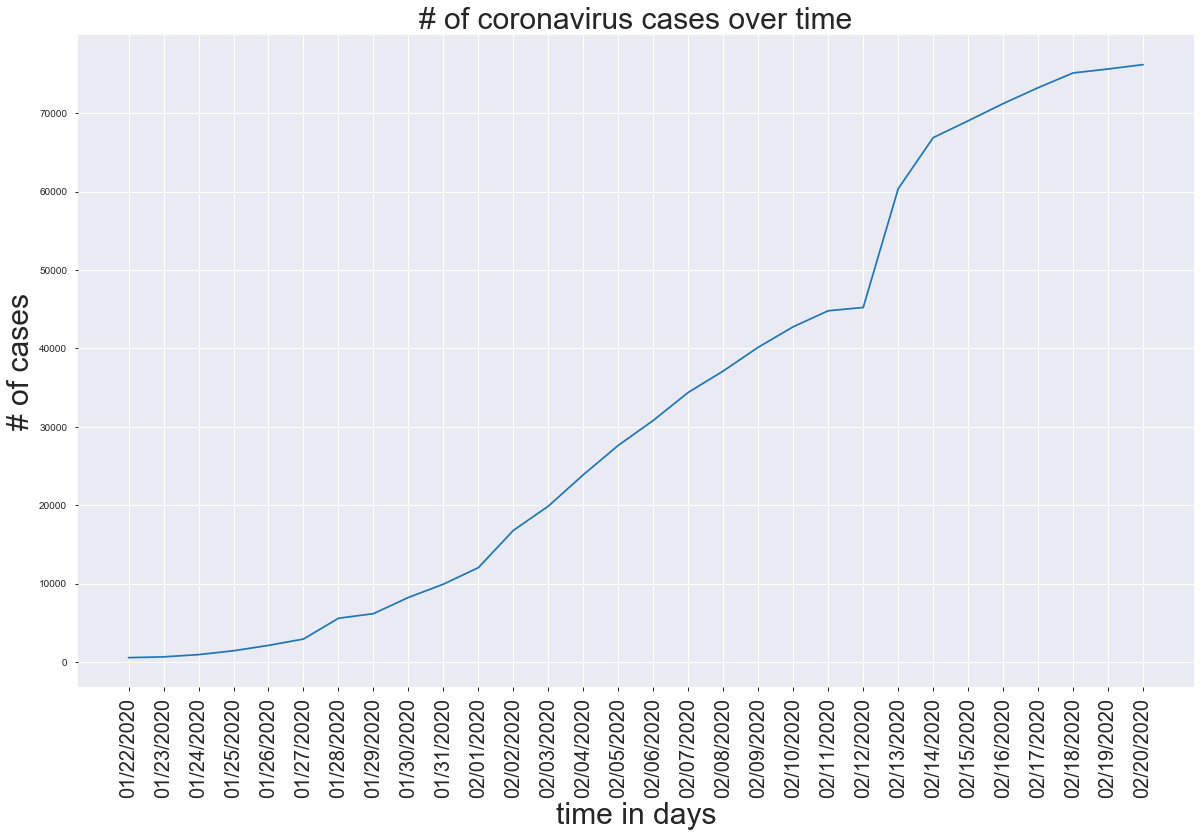

In [292]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates1, world_cases1)
plt.title('# of coronavirus cases over time',size=30)
plt.xlabel('time in days',size=30)
plt.ylabel('# of cases',size=30)
plt.xticks(rotation=90,size=20)
plt.show()

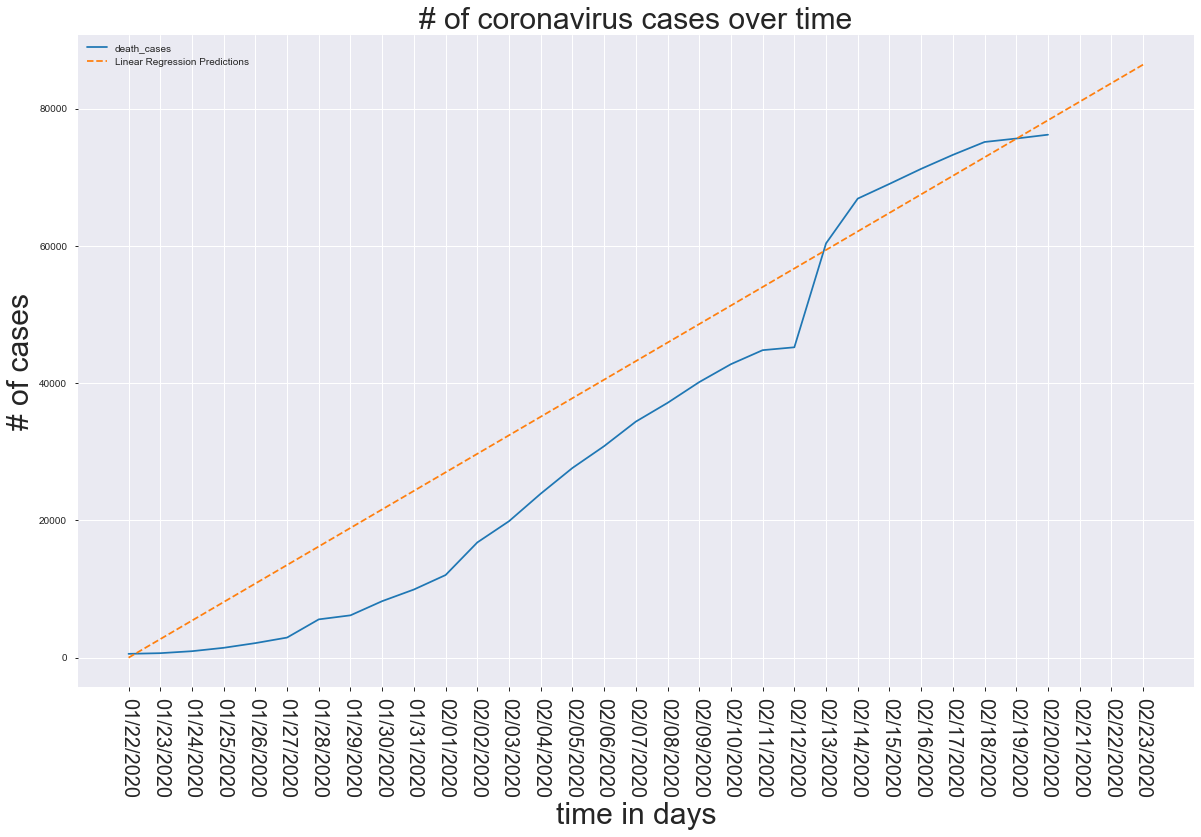

In [293]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates1, world_cases1)
plt.plot(future_forecast_dates1,linear_pred1,linestyle='dashed')
plt.title('# of coronavirus cases over time',size=30)
plt.xlabel('time in days',size=30)
plt.ylabel('# of cases',size=30)
plt.legend(['death_cases','Linear Regression Predictions'])
plt.xticks(rotation=270,size=20)
plt.show()